### The bus paradox

Code from [here](http://jakevdp.github.io/blog/2018/09/13/waiting-time-paradox/)

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import poisson

sns.set()

In [2]:
N = 1000000
tau = 10
rand = np.random.RandomState(42)

bus_arrival_times = N * 10 * np.sort(rand.rand(N))

In [12]:
intervals = np.diff(bus_arrival_times)
print(f'Mean intervals: {intervals.mean()}')

Mean intervals: 9.99998796015184


In [14]:
def simulate_wait_times(arrival_times, rseed = 42, n_passangers = 10_000_000):
    rand = np.random.RandomState(rseed)
    
    arrival_times = np.asarray(arrival_times)
    passenger_times = arrival_times.max() * rand.rand(n_passangers)
    
    i = np.searchsorted(arrival_times, passenger_times, side = 'ride')
    
    return arrival_times[i] - passenger_times

In [15]:
wait_times = simulate_wait_times(bus_arrival_times)
print(f'Mean wait time: {wait_times.mean()}')

Mean wait time: 9.51388182070632


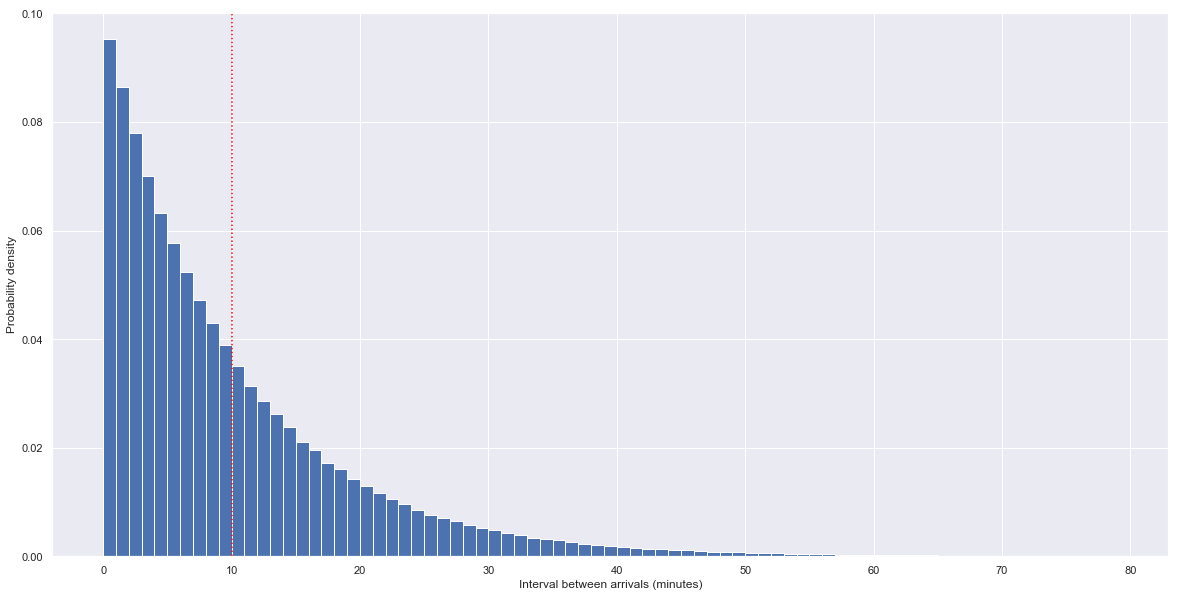

In [20]:
plt.figure(figsize=(20,10))
plt.hist(intervals, bins = np.arange(80), density=True)
plt.axvline(intervals.mean(), color = 'red', linestyle = 'dotted')
plt.xlabel('Interval between arrivals (minutes)')
plt.ylabel('Probability density')
plt.show()

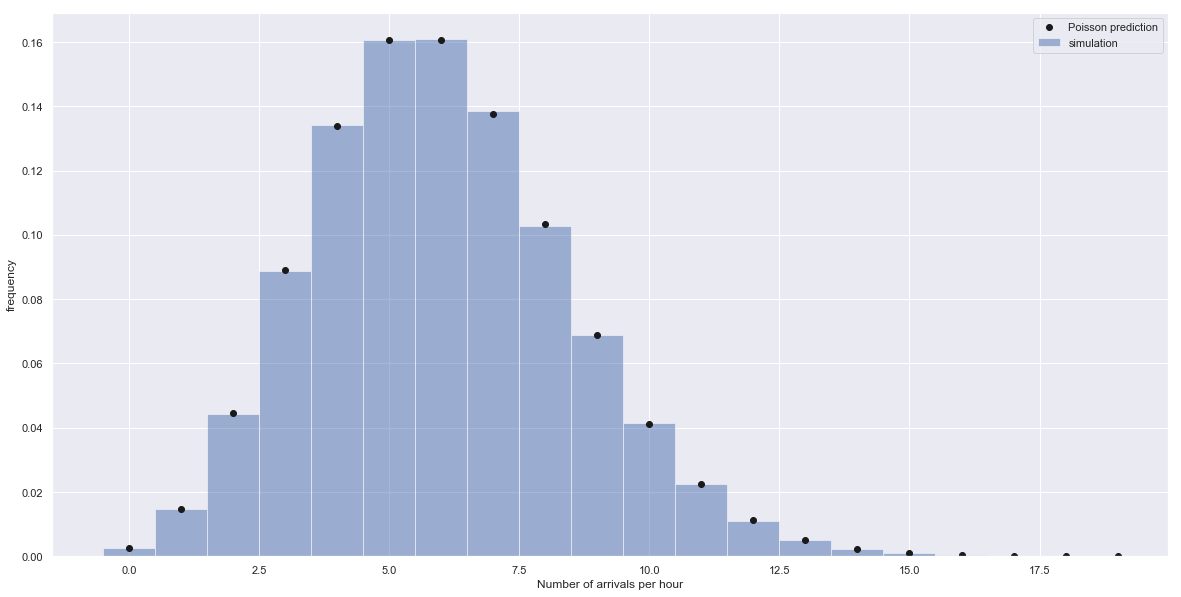

In [22]:
binsize = 60
binned_arrivals = np.bincount((bus_arrival_times//binsize).astype(int))
x = np.arange(20)

plt.figure(figsize=(20,10))
plt.hist(binned_arrivals, bins=x - 0.5, density=True, alpha=0.5, label='simulation')
plt.plot(x, poisson(binsize / tau).pmf(x), 'ok', label='Poisson prediction')
plt.xlabel('Number of arrivals per hour')
plt.ylabel('frequency')
plt.legend();
plt.show()